In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

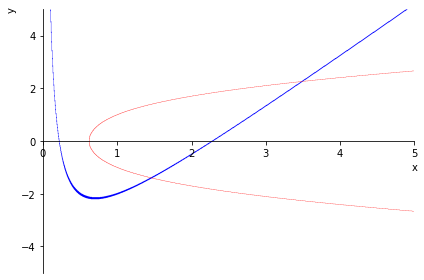

In [14]:
(x, y) = sympy.symbols("x y")
eq1 = 2 * x**2 -x * y - 5*x + 1 
eq2 = x + 3*sympy.log(x)/sympy.log(10)-y**2
plots = sympy.plot_implicit(sympy.Eq(eq1, 0), (x, 0, 5), (y, -5, 5), line_color = "blue", show = False)
plots.extend(sympy.plot_implicit(sympy.Eq(eq2, 0), (x, 0, 5), (y, -5, 5), line_color = "red", show = False))
plots.show()

In [15]:
x = [3.5, 2.2]

In [16]:
EPS = 0.0001

In [17]:
def getX1(x1, x2):
    return np.sqrt((x1*(x2+5)-1)/2)

In [18]:
def getX2(x1, x2):
    return np.sqrt(x1+3*np.log(x1)/np.log(10))

In [19]:
def Prost(X):
    X = np.asarray(X)
    delta = 1
    while delta>EPS:
        newX = X.copy()
        newX[0]=getX1(*X)
        print(newX[0], newX[1])
        newX[1]=getX2(*X)
        print(newX[0], newX[1])
        dif = X - newX
        #delta = np.sqrt(dif.dot(dif))
        delta = np.max(np.abs(dif))
        X = newX

In [20]:
Prost(x)

3.478505426185217 2.2
3.478505426185217 2.2654368525851316
3.4837380437773606 2.2654368525851316
3.4837380437773606 2.258912012819422
3.4848348551611106 2.258912012819422
3.4848348551611106 2.260503155813001
3.4858036708472544 2.260503155813001
3.4858036708472544 2.2608364515892805
3.48639142641582 2.2608364515892805
3.48639142641582 2.2611307878121307
3.486771008018175 2.2611307878121307
3.486771008018175 2.2613093245133986
3.4870132515496235 2.2613093245133986
3.4870132515496235 2.261424614423885
3.4871681817503943 2.261424614423885
3.4871681817503943 2.2614981859333994
3.48726722705797 2.2614981859333994
3.48726722705797 2.2615452376260605


In [21]:
def W(x, y):
    return np.array([
        [4*x-y-5, -x],
        [1+3/np.log(10)/x, -2*y]
    ])

In [22]:
def eq1(x,y):
    return 2*x**2-x*y-5*x+1

def eq2(x,y):
    return x+3/np.log(10)*np.log(x)-y**2

In [23]:
def Newton(X):
    X = np.asarray(X)
    delta = 1
    while delta>EPS:
        w = W(*X)
        f = np.array([[eq1(*X)], [eq2(*X)]])
        del_x = np.linalg.solve(w, -f)
        newX = X.copy()
        newX[0] += del_x[0][0]
        newX[1] += del_x[1][0]
        dif = X - newX
        #delta = np.sqrt(dif.dot(dif))
        delta = np.max(np.abs(dif))
        X = newX
        print(*X)

In [24]:
Newton([3.5, 2.2])

3.4881640261660003 2.262718679408229
3.4874429992326275 2.2616289634900273
3.4874427876429723 2.261628630553625


In [26]:
a = 0.6
m = 0.1

In [27]:
def eq1(x, y):
    return np.tan(x*y+m)-x

In [28]:
def eq2(x, y):
    return a*x**2 + 2*y**2-1

In [29]:
def eqx(x, y):
    return np.tan(x*y+m)
    
def eqy(x, y):
    return np.sqrt((1-a*x**2)/2)

In [17]:
(x, y) = sympy.symbols("x y")
eq1 = sympy.tan(x * y + m) - x
eq2 = a * (x ** 2) + 2 * (y ** 2) - 1
plots = sympy.plot_implicit(sympy.Eq(eq1, 0), (x, -2, 2), (y, -2, 2), line_color = "blue", show = False)
plots.extend(sympy.plot_implicit(sympy.Eq(eq2, 0), (x, -2, 2), (y, -2, 2), line_color = "red", show = False))

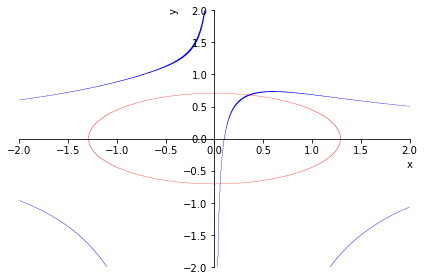

In [18]:
plots.show()

In [19]:
def Prost(X):
    X = np.asarray(X)
    delta = 1
    while delta>EPS:
        newX = X.copy()
        newX[0]=eqx(*newX)
        print(newX[0], newX[1])
        newX[1]=eqy(*newX)
        print(newX[0], newX[1])
        dif = X - newX
        #delta = np.sqrt(dif.dot(dif))
        delta = np.max(np.abs(dif))
        X = newX

In [20]:
Prost([0.4, 0.6])

0.3537368780391225 0.6
0.3537368780391225 0.6800449002341982
0.35436365379840035 0.6800449002341982
0.35436365379840035 0.679946998125585


In [30]:
def W(x, y):
    return np.array([
        [y/(np.cos(x*y+m))**2-1, x/(np.cos(x*y+m))**2],
        [2*a*x, 4*y]
    ])

In [31]:
def Newton(X):
    X = np.asarray(X)
    delta = 1
    while delta>EPS:
        w = W(*X)
        f = np.array([[eq1(*X)], [eq2(*X)]])
        del_x = np.linalg.solve(w, -f)
        newX = X.copy()
        newX[0] += del_x[0][0]
        newX[1] += del_x[1][0]
        dif = X - newX
        #delta = np.sqrt(dif.dot(dif))
        delta = np.max(np.abs(dif))
        X = newX
        print(*X)

In [32]:
Newton([0.4, 0.6])

0.37166010941406835 0.682334644783853
0.35558037878756943 0.6798181216151504
0.35584780079681766 0.6797144510765976
